In [1]:
import numpy as np 
import pandas as pd
import wrds
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from scipy import stats
from scipy.stats import rankdata
import scipy.stats as st
import statsmodels.api as sm

In [ ]:
db = wrds.Connection(wrds_username='malachinelson')

In [ ]:
## Pull Raw Data From Compustat (Note: Only need to do once)
# compustat_raw = db.raw_sql('''
#                             select gvkey, tic, fyear, act, ao, at, lct, lo, lse, lt, ni, revt
#                             from comp.funda
#                             where fyear >= 1975
#                             ''')
# compustat_raw = compustat_raw.sort_values(by = ['gvkey','fyear']).dropna().drop_duplicates()
# compustat_raw.to_csv('C:/Users/nelso/Downloads/Data/compustat_data.csv')

In [2]:
## Clean CRSP data and pull create annual returns for Jan 1(Note: Only need to do once)
# df = pd.read_csv("C:/Users/nelso/Downloads/Data/crsp_daily.csv.gz").rename({'date': "yyyymmdd"}, axis=1)
# df.drop(df[df['RET'] == 'C'].index, inplace = True)
# df.drop(df[df['RET'] == 'B'].index, inplace = True)
# df.drop(df[df['RET'] == 'A'].index, inplace = True)
# df['date'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')
# df['year'] = pd.to_datetime(df['date']).dt.year
# df.columns = df.columns.str.lower()
# df['ret'] =df['ret'].astype(float)
# df["returns_plus_1"]  = df['ret'] + 1
# df1 = df.assign(Cumprod=df.groupby(['year','ticker']).returns_plus_1.cumprod())
# dfjan1 = df1.groupby(['year','ticker']).last().reset_index()
# dfjan1 = dfjan1.rename({'Cumprod': "return.1"}, axis=1)
# dfjan1['mcap'] = (dfjan1['prc'] * (dfjan1['shrout']*1000))/1000000000
# dfjan1['mcap_rank'] = dfjan1.groupby(['year'])['mcap'].rank(ascending=False)

In [8]:
## Create annual returns for Jan 10(Note: Only need to do once)
# df2 = df[(df['year']==1975) & (df['date']>='01/10/1975') | (df['year']==1976) & (df['date']>='01/10/1976') | 
# (df['year']==1977) & (df['date']>='01/10/1977') | (df['year']==1978) & (df['date']>='01/10/1978') | 
# (df['year']==1979) & (df['date']>='01/10/1979') | (df['year']==1980) & (df['date']>='01/10/1980') | 
# (df['year']==1981) & (df['date']>='01/10/1981') | (df['year']==1982) & (df['date']>='01/10/1982') | 
# (df['year']==1983) & (df['date']>='01/10/1983') | (df['year']==1984) & (df['date']>='01/10/1984') | 
# (df['year']==1985) & (df['date']>='01/10/1985') | (df['year']==1986) & (df['date']>='01/10/1986') | 
# (df['year']==1987) & (df['date']>='01/10/1987') | (df['year']==1988) & (df['date']>='01/10/1988') | 
# (df['year']==1989) & (df['date']>='01/10/1989') | (df['year']==1990) & (df['date']>='01/10/1990') | 
# (df['year']==1991) & (df['date']>='01/10/1991') | (df['year']==1992) & (df['date']>='01/10/1992') | 
# (df['year']==1993) & (df['date']>='01/10/1993') | (df['year']==1994) & (df['date']>='01/10/1994') | 
# (df['year']==1995) & (df['date']>='01/10/1995') | (df['year']==1996) & (df['date']>='01/10/1996') | 
# (df['year']==1997) & (df['date']>='01/10/1997') | (df['year']==1998) & (df['date']>='01/10/1998') | 
# (df['year']==1999) & (df['date']>='01/10/1999') | (df['year']==2000) & (df['date']>='01/10/2000') | 
# (df['year']==2001) & (df['date']>='01/10/2001') | (df['year']==2002) & (df['date']>='01/10/2002') | 
# (df['year']==2003) & (df['date']>='01/10/2003') | (df['year']==2004) & (df['date']>='01/10/2004') | 
# (df['year']==2005) & (df['date']>='01/10/2005') | (df['year']==2006) & (df['date']>='01/10/2006') | 
# (df['year']==2007) & (df['date']>='01/10/2007') | (df['year']==2008) & (df['date']>='01/10/2008') | 
# (df['year']==2009) & (df['date']>='01/10/2009') | (df['year']==2010) & (df['date']>='01/10/2010') | 
# (df['year']==2011) & (df['date']>='01/10/2011') | (df['year']==2012) & (df['date']>='01/10/2012') | 
# (df['year']==2013) & (df['date']>='01/10/2013') | (df['year']==2014) & (df['date']>='01/10/2014') | 
# (df['year']==2015) & (df['date']>='01/10/2015') | (df['year']==2016) & (df['date']>='01/10/2016') | 
# (df['year']==2017) & (df['date']>='01/10/2017') | (df['year']==2018) & (df['date']>='01/10/2018') | 
# (df['year']==2019) & (df['date']>='01/10/2019') | (df['year']==2020) & (df['date']>='01/10/2020') | 
# (df['year']==2021) & (df['date']>='01/10/2021') | (df['year']==2022) & (df['date']>='01/10/2022') ]
# df2 = df2.assign(Cumprod=df2.groupby(['year','ticker']).returns_plus_1.cumprod())
# dfjan10 = df2.groupby(['year','ticker']).last().reset_index()
# dfjan10 = dfjan10.rename({'Cumprod': "return.10"}, axis=1)
# crsp_data_clean = dfjan1.merge(dfjan10[['year','ticker','permno','return.10']], on=['year','ticker','permno'],how='inner')
# crsp_data_clean.to_csv('C:/Users/nelso/Downloads/Data/crsp_data_clean.csv')

# Using Finacials to pull CAGRs for NI, Assets and Rev

In [33]:
fin = pd.read_csv("C:/Users/nelso/Downloads/Data/compustat_data.csv")
fin['fyear'] = pd.to_datetime(fin.fyear, format='%Y').dt.year
fin = fin.sort_values(['tic','fyear'], ascending=[True,True])
fin['fyear+10'] = fin['fyear'] + 10
fin_new = pd.merge(fin, fin, how='inner', left_on=['tic', 'fyear'], right_on=['tic','fyear+10'], suffixes=['_end', '_start'])
fin_new = fin_new.drop(['fyear+10_start','fyear+10_end'],axis=1)
fin_new = fin_new[fin_new['ni_start'] != 0]
fin_new = fin_new[fin_new['ni_end'] != 0]
fin_new['CAGR10_ni'] = (fin_new['ni_end']/fin_new['ni_start'])**(0.1)-1
fin_new['CAGR10_assets'] = (fin_new['at_end']/fin_new['at_start'])**(0.1)-1
fin_new['CAGR10_rev'] = (fin_new['revt_end']/fin_new['revt_start'])**(0.1)-1
fin_new['ni/at'] = fin_new['ni_start']/fin_new['at_start']
fin_CAGR = fin_new[['tic','fyear_end','CAGR10_ni','CAGR10_assets','CAGR10_rev','ni/at']]
fin_CAGR

,tic,fyear_end,CAGR10_ni,CAGR10_assets,CAGR10_rev,ni/at
0,0015B,1992,0.163274,0.225466,0.227790,0.107341
1,0015B,1993,0.135837,0.160782,0.187227,0.091059
2,0015B,1994,0.106312,0.152186,0.171078,0.093916
3,0015B,1995,-0.007869,0.142323,0.165353,0.082784
4,0015B,1996,0.052906,0.111563,0.153482,0.070797
...,...,...,...,...,...,...
129236,ZZ,2008,-0.218578,0.020590,0.053293,-0.044966
129237,ZZ,2009,-0.015849,0.027931,0.027274,0.020521
129238,ZZ,2010,NaN,0.012171,0.010223,0.036313
129239,ZZ,2011,-0.071723,0.001765,0.002757,-0.023045


# Merging all of the datasets together

In [34]:
ret = pd.read_csv('C:/Users/nelso/Downloads/Data/crsp_data_clean.csv')
final_data_set = pd.merge(ret,fin_CAGR, left_on=['year','ticker'], right_on=['fyear_end','tic']).rename({'return.1': "annual_return",'return.10': "annual_return_jan10"}, axis=1)
final_data_set.head()
final_data_set.to_csv('C:/Users/nelso/Downloads/Data/final_data_set.csv')

# Removing Non-Stocks + Anything Not From The Major US Exchanges

In [35]:
sec_info = pd.read_csv('C:/Users/nelso/Downloads/Data/sec_info.csv.gz')
sec_info = sec_info[(sec_info['SHRCD'] == 10)  | (sec_info['SHRCD'] == 11) | (sec_info['SHRCD'] == 12) ]
sec_info = sec_info[(sec_info['EXCHCD'] == 2)  | (sec_info['EXCHCD'] == 1) | (sec_info['EXCHCD'] == 3) ]
sec_info = sec_info[['TICKER']].drop_duplicates()
final_data_set = pd.read_csv('C:/Users/nelso/Downloads/Data/final_data_set.csv')
inflation_factors = pd.read_csv('C:/Users/nelso/Downloads/Data/inflation_multiples.csv')
final_dataset2 = pd.merge(final_data_set, sec_info['TICKER'] , left_on=['ticker'], right_on=['TICKER'], how='inner')
final_dataset2 = final_dataset2.drop(['Unnamed: 0','Unnamed: 0.1','tic','TICKER','fyear_end'],axis=1)
final_dataset2['CAGR10_ni_rank'] = final_dataset2.groupby(['year'])['CAGR10_ni'].rank(ascending=False)
final_dataset_merge = final_dataset2.merge(inflation_factors, on='year')
final_dataset_merge['mcap_inf']= final_dataset_merge['mcap']* final_dataset_merge['inflation_multiple']
final_dataset_merge = final_dataset_merge[(final_dataset_merge['mcap_inf'] > .5)]
final_dataset_merge = final_dataset_merge[(final_dataset_merge['ni/at'] > .0015)]
final_dataset_merge = final_dataset_merge[['year','ticker','permno','annual_return','annual_return_jan10','mcap','inflation_multiple','mcap_inf','mcap_rank','CAGR10_ni','CAGR10_ni_rank','CAGR10_assets','CAGR10_rev']]
final_dataset_merge = final_dataset_merge.rename({'return.1': "annual_return"}, axis=1)
final_dataset_merge.head()

,year,ticker,permno,annual_return,annual_return_jan10,mcap,inflation_multiple,mcap_inf,mcap_rank,CAGR10_ni,CAGR10_ni_rank,CAGR10_assets,CAGR10_rev
3,1985,ABT,20482,1.682301,1.742832,8.207598,2.55,20.929376,37.0,0.207405,129.0,0.141233,0.135780
6,1985,ADI,60871,1.395502,1.433423,0.840809,2.55,2.144062,546.0,0.361019,33.0,0.325725,0.267889
8,1985,ADM,10516,1.436892,1.446345,2.652104,2.55,6.762865,187.0,0.167113,196.0,0.199097,0.100248
14,1985,AEP,24109,1.239796,1.225294,4.552301,2.55,11.608368,93.0,0.080177,426.0,0.078322,0.114192
21,1985,AIT,65859,1.490425,1.502662,10.425605,2.55,26.585291,22.0,0.016182,532.0,0.108465,0.106375


# Adding a Lagged Column

In [36]:
final_dataset_merge['next_yr'] = final_dataset_merge['year']+1
final_dataset3 = pd.merge(final_dataset_merge,final_dataset_merge[['permno','year','annual_return','annual_return_jan10']],left_on =['permno','next_yr'],right_on=['permno','year'],how='left')
final_dataset3 = final_dataset3.rename({'annual_return_y': "next_yr_ret",'annual_return_jan10_y': "next_yr_ret_jan10"}, axis=1)
final_dataset3 = final_dataset3.rename({'annual_return_x': "annual_return",'annual_return_jan10_x': "annual_return_jan10"}, axis=1)
final_dataset3 = final_dataset3.rename({'year_x': "year"}, axis=1)
final_dataset3[final_dataset3['year']==2021] = final_dataset3.fillna({'next_yr_ret':0,'next_yr_ret_jan10':0})
final_dataset3.dropna(subset=['next_yr_ret'], inplace=True)
final_dataset3['CAGR10_ni_rank'] = final_dataset3.groupby(['year'])['CAGR10_ni'].rank(ascending=False)
# full_lagged_ni_growth = final_dataset3.drop(['next_yr', 'year_y', 'Unnamed: 0'], axis = 1)
full_lagged_ni_growth = final_dataset3.sort_values(by = ['year']).reset_index().drop(['next_yr', 'year_y','index'], axis = 1)
full_lagged_ni_growth.to_csv('C:/Users/nelso/Downloads/Data/full_lagged_ni_growth.csv',index=False)
full_lagged_ni_growth

,year,ticker,permno,annual_return,annual_return_jan10,mcap,inflation_multiple,mcap_inf,mcap_rank,CAGR10_ni,CAGR10_ni_rank,CAGR10_assets,CAGR10_rev,next_yr_ret,next_yr_ret_jan10
0,1985,ABT,20482,1.682301,1.742832,8.207598,2.55,20.929376,37.0,0.207405,48.0,0.141233,0.135780,1.360463,1.407285
1,1985,NL,13303,1.248481,1.339835,0.838067,2.55,2.137070,547.0,-0.072280,241.0,0.041857,0.010701,1.648193,1.561446
2,1985,NLCS,56339,1.802481,1.781521,0.287092,2.55,0.732086,1168.0,0.379875,10.0,0.427949,0.372345,0.809811,0.908788
3,1985,NMK,24184,1.312343,1.321853,2.584681,2.55,6.590937,199.0,0.136154,123.0,0.102118,0.107335,0.901822,0.924368
4,1985,NOC,24766,1.283910,1.392549,2.042943,2.55,5.209506,249.0,0.241071,26.0,0.175210,0.177347,0.913493,0.916088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21780,2021,TSN,77730,1.384863,1.393731,25.692240,1.00,25.692240,453.0,0.150485,283.0,0.126115,0.039635,0.000000,0.000000
21781,2021,SYK,73139,1.102208,1.108451,100.881525,1.00,100.881525,103.0,0.040160,737.0,0.108120,0.074918,0.000000,0.000000
21782,2021,RHI,52230,1.813397,1.760152,12.415522,1.00,12.415522,799.0,0.148495,291.0,0.084499,0.055161,0.000000,0.000000
21783,2021,CPE,80926,3.590412,3.192555,2.899402,1.00,2.899402,2080.0,0.133657,333.0,0.311864,0.319684,0.000000,0.000000


## Pull CRSP data and Fama-French data

# Calculating Portfolio Returns Based on Top N Companies

In [43]:
full_lagged_ni_growth = pd.read_csv("C:/Users/nelso/Downloads/Data/full_lagged_ni_growth.csv")

In [44]:
#defining function to caluclate weighted portfolio returns
def wavg_portfolio_rets(df, n, time, identification, rank, ret_col, weighted_on):
    rets = top_rank_companies(df, n, time, identification, rank).groupby([time])
    wavg = pd.concat([rets.apply(lambda x: np.average(x[ret_col],weights=x[weighted_on]))], 
                   axis=1, keys=[ret_col]).reset_index()
    return wavg 

In [3]:
#defining function to grab top ranked portfolios
def top_rank_companies(df, n, time, identification, rank):    
    df_copy = df.copy().set_index([identification])
    df = df.copy().set_index([time, identification]).\
            loc[df_copy.groupby(time)[rank].nsmallest(n).index]
    return df.reset_index()

In [11]:
#defining function to caluclate portfolio returns
def portfolio_rets(df, n, time, identification, rank, ret_col):
    rets = top_rank_companies(df, n, time, identification, rank)
    rets = rets.set_index(time)
   # rets.to_csv('Portfolio/portfolio.csv')
    portfolio_ret = rets.groupby(time)[ret_col].mean()
    return portfolio_ret

In [56]:
top30portret_eq = portfolio_rets(full_lagged_ni_growth, 30, 'year', 'ticker', 'CAGR10_ni_rank','annual_return')
top10portret_eq = portfolio_rets(full_lagged_ni_growth, 10, 'year', 'ticker', 'CAGR10_ni_rank','annual_return')
top20portret_eq = portfolio_rets(full_lagged_ni_growth, 20, 'year', 'ticker', 'CAGR10_ni_rank','annual_return')
top30portret_wavg = wavg_portfolio_rets(full_lagged_ni_growth, 30, 'year', 'ticker', 'CAGR10_ni_rank','annual_return','mcap')
top10portret_wavg = wavg_portfolio_rets(full_lagged_ni_growth, 10, 'year', 'ticker', 'CAGR10_ni_rank','annual_return','mcap')
top20portret_wavg = wavg_portfolio_rets(full_lagged_ni_growth, 20, 'year', 'ticker', 'CAGR10_ni_rank','annual_return','mcap')

In [57]:
top30portret_eq.to_csv('C:/Users/nelso/Downloads/Data/top30portret_eq.csv')
top20portret_eq.to_csv('C:/Users/nelso/Downloads/Data/top20portret_eq.csv')
top10portret_eq.to_csv('C:/Users/nelso/Downloads/Data/top10portret_eq.csv')
top30portret_wavg.to_csv('C:/Users/nelso/Downloads/Data/top30portret_wavg.csv')
top20portret_wavg.to_csv('C:/Users/nelso/Downloads/Data/top20portret_wavg.csv')
top10portret_wavg.to_csv('C:/Users/nelso/Downloads/Data/top10portret_wavg.csv')

In [25]:
#defining function to grab top ranked portfolios
def top_rank_companies(df, n, time, identification, rank):    
    df_copy = df.copy().set_index([identification])
    df = df.copy().set_index([time, identification]).\
            loc[df_copy.groupby(time)[rank].nsmallest(n).index]
    return df.reset_index()

top_rank_companies(full_lagged_ni_growth, 30, 'year', 'ticker', 'CAGR10_ni_rank').to_csv('C:/Users/nelso/Downloads/Data/test_returns.csv')

# FamaMcBeth

In [38]:
yearlist = full_lagged_ni_growth['year'].drop_duplicates().to_list()
yearlist = [i for i in yearlist if i < 1980]
yearlist.append(2021)
famaMcBethData = full_lagged_ni_growth[full_lagged_ni_growth.year.isin(yearlist) == False]
famaMcBethData.dropna(subset=['CAGR10_ni'], inplace=True)

In [39]:
fm_result =[]

for year in famaMcBethData['year'].unique():
    cross_section_year = famaMcBethData[famaMcBethData['year']==year]
    Y_year = cross_section_year['next_yr_ret']
    X_year = cross_section_year[['CAGR10_ni']]
    ols=OLS(Y_year, add_constant(X_year)).fit()

    
    fm_result.append(pd.DataFrame({'const':ols.params[0],'X1_CAGR10_ni':ols.params[1],'fmyear':year}, index=[0]))

fm_result = pd.concat(fm_result, axis=0)

In [40]:
fm_result
fm_result = fm_result.rename({'fmyear': "year"}, axis=1).sort_values(by = ['year'])
fm_result.describe()

,const,X1_CAGR10_ni,year
count,36.000000,36.000000,36.000000
mean,1.148556,0.080335,2002.500000
std,0.141342,0.323079,10.535654
min,0.724460,-0.303349,1985.000000
25%,1.075099,-0.125883,1993.750000
50%,1.170559,-0.003372,2002.500000
75%,1.237000,0.223189,2011.250000
max,1.417833,1.268742,2020.000000


<AxesSubplot:xlabel='year'>

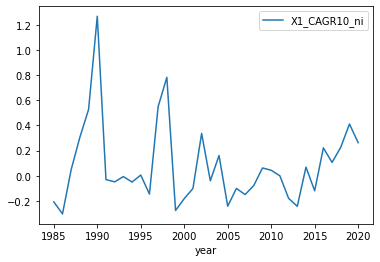

In [41]:
fm_result[['year','X1_CAGR10_ni']].plot.line(x='year',y='X1_CAGR10_ni')

In [42]:
cagr_ni_sum = fm_result['X1_CAGR10_ni'].sum()
year_count = fm_result['X1_CAGR10_ni'].count()
ni_gamma = cagr_ni_sum / year_count
ni_gamma

0.0803354857816971

In [27]:
print ('Full Universe',st.ttest_1samp(fm_result['X1_CAGR10_ni'],0))

Full Universe Ttest_1sampResult(statistic=1.4919347174981539, pvalue=0.14467570166878166)


In [37]:
##Pull Gamma for returns after Jan 10
yearlist = full_lagged_ni_growth['year'].drop_duplicates().to_list()
yearlist = [i for i in yearlist if i < 1980]
yearlist.append(2021)
famaMcBethData = full_lagged_ni_growth[full_lagged_ni_growth.year.isin(yearlist) == False]
famaMcBethData.dropna(subset=['CAGR10_ni'], inplace=True)

fm_result =[]

for year in famaMcBethData['year'].unique():
    cross_section_year = famaMcBethData[famaMcBethData['year']==year]
    Y_year = cross_section_year['next_yr_ret_jan10']
    X_year = cross_section_year[['CAGR10_ni']]
    ols=OLS(Y_year, add_constant(X_year)).fit()

    
    fm_result.append(pd.DataFrame({'const':ols.params[0],'X1_CAGR10_ni':ols.params[1],'fmyear':year}, index=[0]))

fm_result = pd.concat(fm_result, axis=0)

fm_result
fm_result = fm_result.rename({'fmyear': "year"}, axis=1).sort_values(by = ['year'])
fm_result.describe()

cagr_ni_sum = fm_result['X1_CAGR10_ni'].sum()
year_count = fm_result['X1_CAGR10_ni'].count()
ni_gamma = cagr_ni_sum / year_count
ni_gamma

C:\Users\nelso\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.07786603927342563

# Fama French

In [53]:
df = pd.read_csv('C:/Users/nelso/Downloads/Data/ff_annual.csv')

### Equal Weighted

In [19]:
#Top 10
portfolio_ret_10eq = pd.read_csv('C:/Users/nelso/Downloads/Data/top10portret_eq.csv')
port_ret_10eq = portfolio_ret_10eq.merge(df, on='year')
port_ret_10eq['annual_ret%'] = port_ret_10eq['annual_return']-1
port_ret_10eq['annual_ret%'] = port_ret_10eq['annual_ret%'] *100
port_ret_10eq['excess_ret'] = port_ret_10eq['annual_ret%'] -  port_ret_10eq['RF']

X = sm.add_constant(port_ret_10eq[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_10eq['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     5.258
Date:                Fri, 16 Dec 2022   Prob (F-statistic):            0.00131
Time:                        21:19:02   Log-Likelihood:                -168.95
No. Observations:                  37   AIC:                             349.9
Df Residuals:                      31   BIC:                             359.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4871      6.862      2.403      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
#Top 20
portfolio_ret_20eq = pd.read_csv('C:/Users/nelso/Downloads/Data/top20portret_eq.csv')
port_ret_20eq = portfolio_ret_20eq.merge(df, on='year')
port_ret_20eq['annual_ret%'] = port_ret_20eq['annual_return']-1
port_ret_20eq['annual_ret%'] = port_ret_20eq['annual_ret%'] *100
port_ret_20eq['excess_ret'] = port_ret_20eq['annual_ret%'] -  port_ret_20eq['RF']

X = sm.add_constant(port_ret_20eq[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_20eq['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     10.07
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           8.47e-06
Time:                        23:10:11   Log-Likelihood:                -154.64
No. Observations:                  37   AIC:                             321.3
Df Residuals:                      31   BIC:                             331.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8872      4.661      2.979      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
#Top 30 
portfolio_ret_30eq = pd.read_csv('C:/Users/nelso/Downloads/Data/top30portret_eq.csv')
port_ret_30eq = portfolio_ret_30eq.merge(df, on='year')
port_ret_30eq['annual_ret%'] = port_ret_30eq['annual_return']-1
port_ret_30eq['annual_ret%'] = port_ret_30eq['annual_ret%'] *100
port_ret_30eq['excess_ret'] = port_ret_30eq['annual_ret%'] -  port_ret_30eq['RF']

X = sm.add_constant(port_ret_30eq[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_30eq['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     16.48
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           6.13e-08
Time:                        23:10:18   Log-Likelihood:                -144.05
No. Observations:                  37   AIC:                             300.1
Df Residuals:                      31   BIC:                             309.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1153      3.501      3.746      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
#Top 30 (Jan 10)
portfolio_ret_30eq_jan10 = pd.DataFrame(portfolio_rets(full_lagged_ni_growth, 30, 'year', 'ticker', 'CAGR10_ni_rank','annual_return_jan10')).reset_index()
port_ret_30eq_jan10 = portfolio_ret_30eq_jan10.merge(df, on='year')
port_ret_30eq_jan10['annual_ret%'] = port_ret_30eq_jan10['annual_return_jan10']-1
port_ret_30eq_jan10['annual_ret%'] = port_ret_30eq_jan10['annual_ret%'] *100
port_ret_30eq_jan10['excess_ret'] = port_ret_30eq_jan10['annual_ret%'] -  port_ret_30eq_jan10['RF']

X = sm.add_constant(port_ret_30eq_jan10[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_30eq_jan10['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     12.87
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           8.19e-07
Time:                        23:11:11   Log-Likelihood:                -146.90
No. Observations:                  37   AIC:                             305.8
Df Residuals:                      31   BIC:                             315.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6011      3.781      3.597      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### MCap Weighted

In [22]:
#Top 10
portfolio_ret_10wavg = pd.read_csv('C:/Users/nelso/Downloads/Data/top10portret_wavg.csv')
port_ret_10wavg = portfolio_ret_10wavg.merge(df, on='year')
port_ret_10wavg['annual_ret%'] = port_ret_10wavg['annual_return']-1
port_ret_10wavg['annual_ret%'] = port_ret_10wavg['annual_ret%'] *100
port_ret_10wavg['excess_ret'] = port_ret_10wavg['annual_ret%'] -  port_ret_10eq['RF']

X = sm.add_constant(port_ret_10wavg[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_10wavg['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3.565
Date:                Fri, 16 Dec 2022   Prob (F-statistic):             0.0116
Time:                        21:19:09   Log-Likelihood:                -175.97
No. Observations:                  37   AIC:                             363.9
Df Residuals:                      31   BIC:                             373.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6470      8.295      2.851      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
#Top 20
portfolio_ret_20wavg = pd.read_csv('C:/Users/nelso/Downloads/Data/top20portret_wavg.csv')
port_ret_20wavg = portfolio_ret_20wavg.merge(df, on='year')
port_ret_20wavg['annual_ret%'] = port_ret_20wavg['annual_return']-1
port_ret_20wavg['annual_ret%'] = port_ret_20wavg['annual_ret%'] *100
port_ret_20wavg['excess_ret'] = port_ret_20wavg['annual_ret%'] -  port_ret_10eq['RF']

X = sm.add_constant(port_ret_20wavg[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_20wavg['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     5.713
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           0.000757
Time:                        21:19:12   Log-Likelihood:                -167.71
No. Observations:                  37   AIC:                             347.4
Df Residuals:                      31   BIC:                             357.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7500      6.635      3.730      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
#Top 30
portfolio_ret_30wavg = pd.read_csv('C:/Users/nelso/Downloads/Data/top30portret_wavg.csv')
port_ret_30wavg = portfolio_ret_30wavg.merge(df, on='year')
port_ret_30wavg['annual_ret%'] = port_ret_30wavg['annual_return']-1
port_ret_30wavg['annual_ret%'] = port_ret_30wavg['annual_ret%'] *100
port_ret_30wavg['excess_ret'] = port_ret_30wavg['annual_ret%'] -  port_ret_10eq['RF']

X = sm.add_constant(port_ret_30wavg[['Mkt-RF','SMB','HML','RMW','CMA']])
y = port_ret_30wavg['excess_ret'] 
sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     8.739
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           2.96e-05
Time:                        21:19:14   Log-Likelihood:                -161.82
No. Observations:                  37   AIC:                             335.6
Df Residuals:                      31   BIC:                             345.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7792      5.659      3.849      0.0

C:\Users\nelso\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
